### PROJECT- INETERACTION ON XIAOMI WEBPAGE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Xiaomi India Case .csv")

In [3]:
df

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668
1,2,Saturday,Chrome,15,5,16.9,3469
2,3,Monday,Internet Explorer,20,6,7.3,5215
3,4,Monday,Chrome,42,6,30.1,10423
4,5,Saturday,Internet Explorer,20,6,13.3,5404
...,...,...,...,...,...,...,...
43195,43196,Friday,Chrome,31,3,13.4,9875
43196,43197,Monday,Chrome,13,4,8.5,2668
43197,43198,Friday,Firefox,29,10,32.9,15530
43198,43199,Monday,Internet Explorer,20,6,7.3,5215


### our objective is understanding the customer nature, behaviour and area of interest on xiaomi website so we are performing EDA with this data.


### BEFORE EDA WE ARE DOING BASIC DATA CLEANING AND DATA EXPLORATION

###  1.DATA CLEANING:

In [4]:
#checked null value...
df.isnull().sum()

Customer              0
Day                   0
Browser               0
No. of Clicks         0
Pages Viewed          0
Time (min)            0
Amount Spent (Rs.)    0
dtype: int64

In [5]:
df.head(10)

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668
1,2,Saturday,Chrome,15,5,16.9,3469
2,3,Monday,Internet Explorer,20,6,7.3,5215
3,4,Monday,Chrome,42,6,30.1,10423
4,5,Saturday,Internet Explorer,20,6,13.3,5404
5,6,Friday,Firefox,40,8,18.0,13440
6,7,Sunday,Chrome,16,4,11.8,3717
7,8,Friday,Firefox,24,4,10.8,7038
8,9,Tuesday,Chrome,24,5,7.8,7181
9,10,Saturday,Chrome,20,4,11.3,5558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer            43200 non-null  int64  
 1   Day                 43200 non-null  object 
 2   Browser             43200 non-null  object 
 3   No. of Clicks       43200 non-null  int64  
 4   Pages Viewed        43200 non-null  int64  
 5   Time (min)          43200 non-null  float64
 6   Amount Spent (Rs.)  43200 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.3+ MB


In [7]:
#CHANGING DATA TYPE AND CHANGING COLUMN NAME 

df.rename(columns = {'Customer':'customer_id'},inplace = True) #RENAME
df['customer_id'] = df['customer_id'].astype("object") #DATA TYPE CHANGE
df

,customer_id,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668
1,2,Saturday,Chrome,15,5,16.9,3469
2,3,Monday,Internet Explorer,20,6,7.3,5215
3,4,Monday,Chrome,42,6,30.1,10423
4,5,Saturday,Internet Explorer,20,6,13.3,5404
...,...,...,...,...,...,...,...
43195,43196,Friday,Chrome,31,3,13.4,9875
43196,43197,Monday,Chrome,13,4,8.5,2668
43197,43198,Friday,Firefox,29,10,32.9,15530
43198,43199,Monday,Internet Explorer,20,6,7.3,5215


### 2.DATA EXPLORATION

In [8]:
df.describe()

,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000
mean,23.740000,4.820000,12.810000,6812.820000
std,8.267647,2.016853,6.002444,3201.905731
min,8.000000,2.000000,4.300000,1784.000000
25%,18.000000,3.000000,8.500000,4473.000000
50%,22.500000,4.500000,11.400000,6215.000000
75%,29.000000,6.000000,15.100000,8412.000000
max,46.000000,10.000000,32.900000,15851.000000


In [9]:
#ADDING FEATURE COLUMNS FOR BETTER DATA EDA
df.rename(columns = {'Amount Spent (Rs.)':'ammount_spend'},inplace= True)

In [10]:
print(df[['ammount_spend']].describe())
print("-----"*10)
print(sorted(df['ammount_spend'].unique()))
f=sorted((df['ammount_spend']).unique())

       ammount_spend
count   43200.000000
mean     6812.820000
std      3201.905731
min      1784.000000
25%      4473.000000
50%      6215.000000
75%      8412.000000
max     15851.000000
--------------------------------------------------
[1784, 2668, 2791, 3269, 3273, 3469, 3604, 3648, 3717, 3906, 4054, 4120, 4473, 4805, 4866, 5209, 5215, 5404, 5452, 5466, 5558, 5596, 5920, 5999, 6014, 6416, 6627, 6744, 6780, 6817, 6845, 6873, 7038, 7094, 7181, 7443, 7858, 8412, 8417, 9162, 9490, 9875, 10315, 10423, 11065, 12025, 12640, 13440, 15530, 15851]


In [11]:
# adding feature 'customer income group' in the data
df['cust_in_gr']=''
df

,customer_id,Day,Browser,No. of Clicks,Pages Viewed,Time (min),ammount_spend,cust_in_gr
0,1,Monday,Chrome,13,4,8.5,2668,
1,2,Saturday,Chrome,15,5,16.9,3469,
2,3,Monday,Internet Explorer,20,6,7.3,5215,
3,4,Monday,Chrome,42,6,30.1,10423,
4,5,Saturday,Internet Explorer,20,6,13.3,5404,
...,...,...,...,...,...,...,...,...
43195,43196,Friday,Chrome,31,3,13.4,9875,
43196,43197,Monday,Chrome,13,4,8.5,2668,
43197,43198,Friday,Firefox,29,10,32.9,15530,
43198,43199,Monday,Internet Explorer,20,6,7.3,5215,


In [12]:
def ammount(x):
    if x>=1784 and x<=4473:
        return("lower_in_gr")         # lower_in_gr = lower income group
    elif x>4473 and x<=6500:
        return("middle_in_gr")        # middle_in_gr = middle income group
    elif x>6500 and x<=9500:             
        return("upper_mid_in_gr")      # upper_mid_in_gr = upper middle income group
    else:
        return("higher_gr")            # higher_gr= higher income group
    
df["cust_in_gr"] = df['ammount_spend'].apply(ammount)




###  adding feature thinker cum deicison maker times . this feature helps to understand customer interaction time on xiaomi webpage, nature of customer type
### quick_deci_maker -quick decision maker/quick thinker
### slow_dec_maker - slow decision maker/slow thinker
### slower_deci_maker- slower decision maker/slower thinker
### slowest_deci_maker - slowest decision maker/slowest thinker


In [13]:
print(df['Time (min)'].describe())
print(sorted(df["Time (min)"].unique()))

count    43200.000000
mean        12.810000
std          6.002444
min          4.300000
25%          8.500000
50%         11.400000
75%         15.100000
max         32.900000
Name: Time (min), dtype: float64
[4.3, 5.0, 5.6, 6.0, 6.2, 7.1, 7.3, 7.8, 8.0, 8.1, 8.4, 8.5, 9.1, 9.6, 9.7, 10.2, 10.5, 10.6, 10.8, 11.0, 11.3, 11.4, 11.7, 11.8, 12.0, 12.7, 13.3, 13.4, 13.7, 14.0, 14.3, 15.1, 15.9, 16.3, 16.5, 16.9, 18.0, 18.1, 19.5, 23.3, 24.4, 24.7, 30.1, 32.9]


In [14]:
# adding feature thinker cum deicison maker times 
def time(x):
    if x>=4.3 and x<=8.5:
        return("quick_deci_maker")
    elif x>=9.1 and x<=12.7:
        return("slow_dec_maker")
    elif x>=13.3 and x<=19.5:
        return("slower_deci_maker")
    else:
        return("slowest_deci_maker")
    
df["decision_maker"] = df['Time (min)'].apply(time)

In [15]:
df.head(100)

,customer_id,Day,Browser,No. of Clicks,Pages Viewed,Time (min),ammount_spend,cust_in_gr,decision_maker
0,1,Monday,Chrome,13,4,8.5,2668,lower_in_gr,quick_deci_maker
1,2,Saturday,Chrome,15,5,16.9,3469,lower_in_gr,slower_deci_maker
2,3,Monday,Internet Explorer,20,6,7.3,5215,middle_in_gr,quick_deci_maker
3,4,Monday,Chrome,42,6,30.1,10423,higher_gr,slowest_deci_maker
4,5,Saturday,Internet Explorer,20,6,13.3,5404,middle_in_gr,slower_deci_maker
...,...,...,...,...,...,...,...,...,...
95,96,Thursday,Chrome,17,2,7.1,4120,lower_in_gr,quick_deci_maker
96,97,Thursday,Chrome,21,4,9.6,5920,middle_in_gr,slow_dec_maker
97,98,Saturday,Chrome,22,7,18.1,6014,middle_in_gr,slower_deci_maker
98,99,Monday,Internet Explorer,37,9,11.8,12025,higher_gr,slow_dec_maker


In [16]:
# BASIC DATA EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     43200 non-null  object 
 1   Day             43200 non-null  object 
 2   Browser         43200 non-null  object 
 3   No. of Clicks   43200 non-null  int64  
 4   Pages Viewed    43200 non-null  int64  
 5   Time (min)      43200 non-null  float64
 6   ammount_spend   43200 non-null  int64  
 7   cust_in_gr      43200 non-null  object 
 8   decision_maker  43200 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.0+ MB


### Categorical  and Numerical Columns

In [17]:

data = list(df.columns)
categorical_data = []
numerical_data = []

for i in data:
    if df[i].dtype == "object" or df[i].dtype == "datetime64":
         categorical_data.append(i)
    elif df[i].dtype == "int64" or df[i].dtype == "float64":
        numerical_data.append(i)
        
print("the categorical columns are: \n",categorical_data)
print("the numerical are: \n",numerical_data)

the categorical columns are: 
 ['customer_id', 'Day', 'Browser', 'cust_in_gr', 'decision_maker']
the numerical are: 
 ['No. of Clicks', 'Pages Viewed', 'Time (min)', 'ammount_spend']


In [18]:
print("pivot tabel 1")
data1=pd.pivot_table(df,index="Browser",values='Pages Viewed',columns="Day")
data1

pivot tabel 1


Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Browser,,,,,,,
Chrome,3.500000,5.6,5.333333,3.0,3.75,5.0,4.0
Firefox,5.833333,7.5,5.000000,5.0,4.00,2.0,3.0
Internet Explorer,4.000000,7.5,6.000000,7.0,NaN,4.0,6.0


BAR GRAPH FROM PIVOT TABLE 1


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


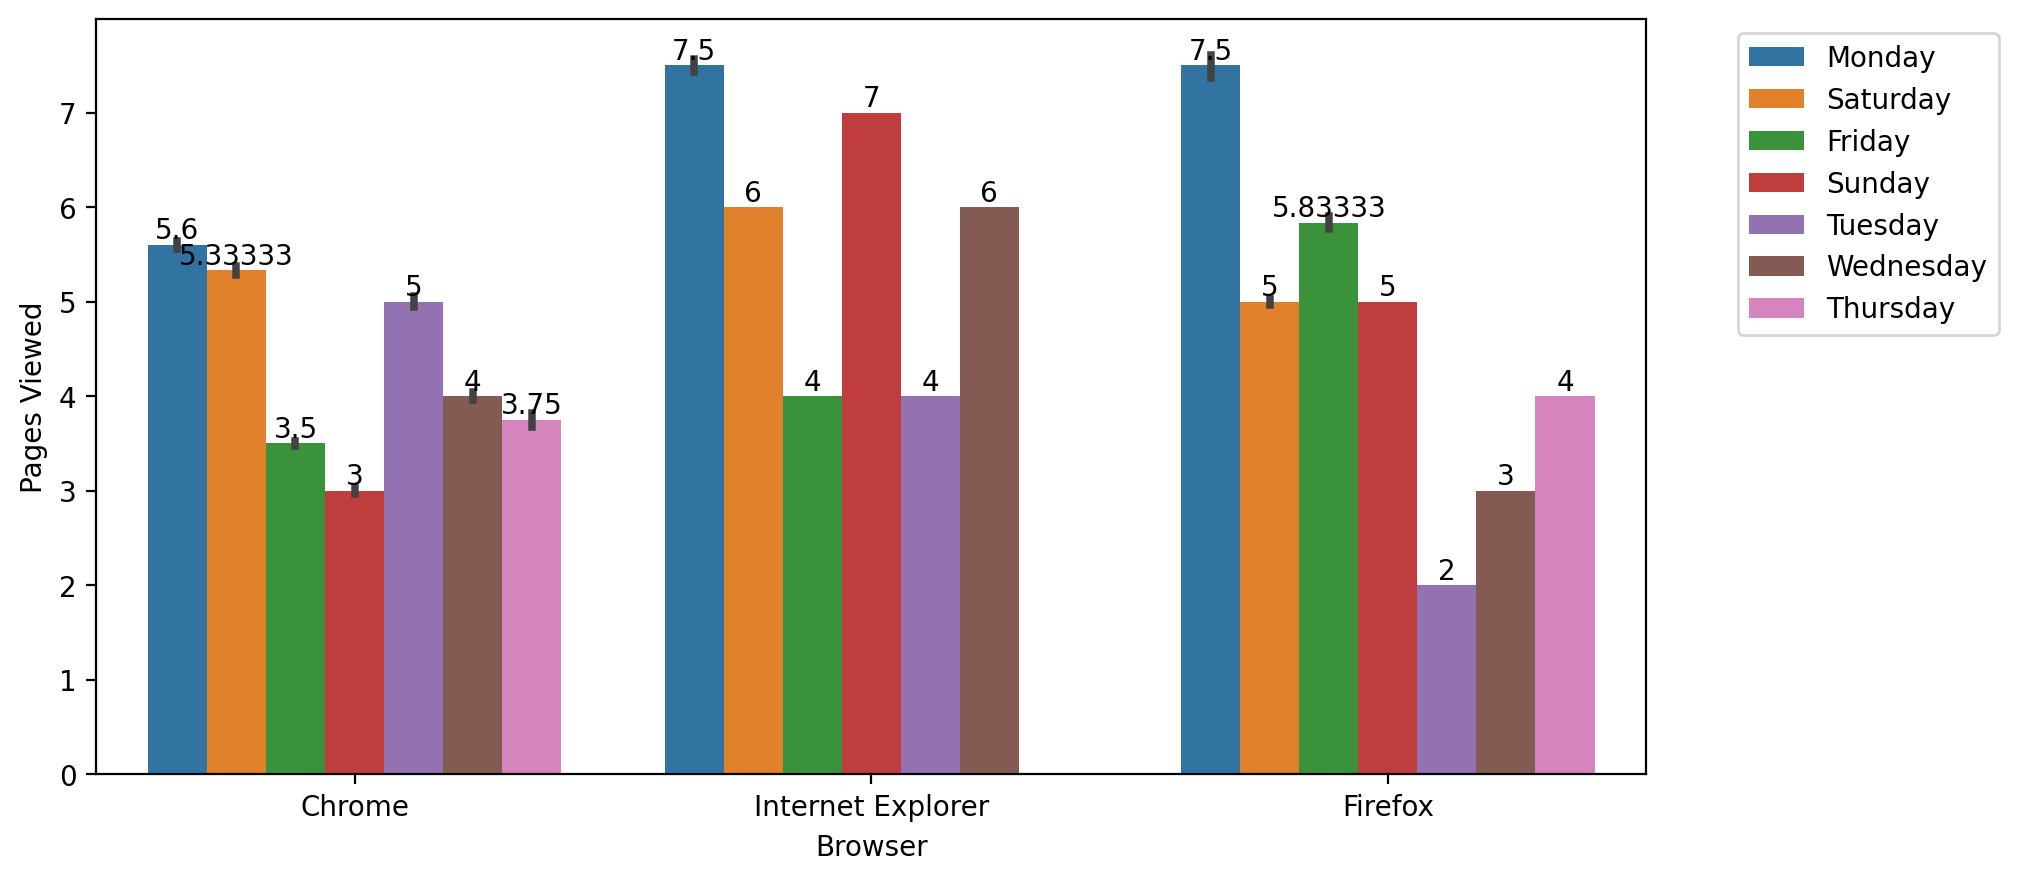

In [19]:
print("BAR GRAPH FROM PIVOT TABLE 1")
fig=plt.figure(figsize=(10,5),dpi = 200)

ax=sns.barplot(df['Browser'],df['Pages Viewed'],hue=df['Day'])
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)



In [20]:
print("pivot table 2")
data=pd.pivot_table(df,index="Browser",values=[ 'No. of Clicks', "Pages Viewed"],aggfunc={'No. of Clicks':np.sum,
                                                                                          "Pages Viewed":'count'})
data = pd.DataFrame(data)
data.rename(columns={'No. of Clicks':'no_of_clicks'},inplace = True)
data = data.reset_index()
data

pivot table 2


,Browser,no_of_clicks,Pages Viewed
0,Chrome,524448,23328
1,Firefox,352512,13824
2,Internet Explorer,148608,6048


bar graphs from pivot table 2


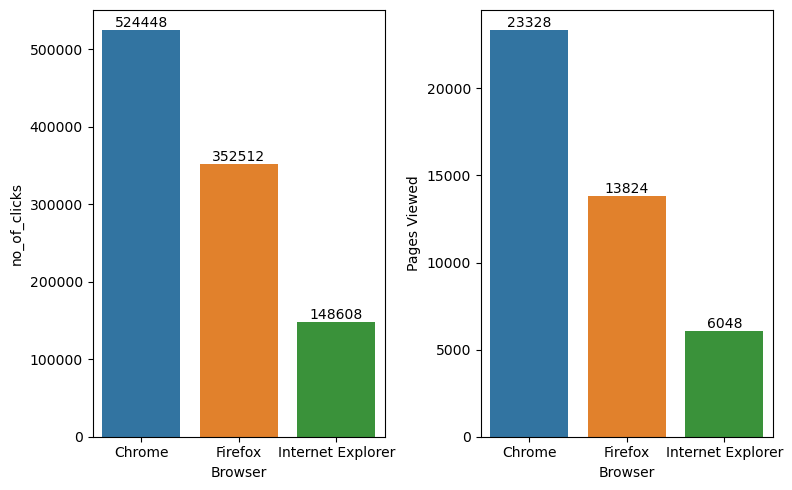

In [21]:
print("bar graphs from pivot table 2")
fig,axes=plt.subplots(1,2,figsize=(8,5),dpi=100)

ax1 = sns.barplot(ax=axes[0],data = data,x='Browser',y='no_of_clicks')

ax1.bar_label(ax1.containers[0])

ax2 = sns.barplot(ax=axes[1],data = data,x='Browser',y='Pages Viewed')

ax2.bar_label(ax2.containers[0])
fig.subplots_adjust(wspace=0.,hspace=0.8)

plt.tight_layout()

In [22]:
df.head(10)

,customer_id,Day,Browser,No. of Clicks,Pages Viewed,Time (min),ammount_spend,cust_in_gr,decision_maker
0,1,Monday,Chrome,13,4,8.5,2668,lower_in_gr,quick_deci_maker
1,2,Saturday,Chrome,15,5,16.9,3469,lower_in_gr,slower_deci_maker
2,3,Monday,Internet Explorer,20,6,7.3,5215,middle_in_gr,quick_deci_maker
3,4,Monday,Chrome,42,6,30.1,10423,higher_gr,slowest_deci_maker
4,5,Saturday,Internet Explorer,20,6,13.3,5404,middle_in_gr,slower_deci_maker
5,6,Friday,Firefox,40,8,18.0,13440,higher_gr,slower_deci_maker
6,7,Sunday,Chrome,16,4,11.8,3717,lower_in_gr,slow_dec_maker
7,8,Friday,Firefox,24,4,10.8,7038,upper_mid_in_gr,slow_dec_maker
8,9,Tuesday,Chrome,24,5,7.8,7181,upper_mid_in_gr,quick_deci_maker
9,10,Saturday,Chrome,20,4,11.3,5558,middle_in_gr,slow_dec_maker


In [23]:
print("pivot tabel 3")
df.rename(columns={'Time (min)':'time_min'},inplace = True)
data2=pd.pivot_table(df,index="Day",columns="Browser",values=[ 'customer_id', 'time_min','ammount_spend'],
                     aggfunc={'customer_id':'count','time_min':'sum','ammount_spend':np.mean})
data2=pd.DataFrame(data2)
data2['ammount_spend']=np.round(data2['ammount_spend'],decimals=2)
data2

pivot tabel 3


ammount_spend                             customer_id          \
Browser          Chrome   Firefox Internet Explorer      Chrome Firefox   
Day                                                                       
Friday          8452.75   8981.17            6845.0      3456.0  5184.0   
Monday          8449.60  10925.00            8620.0      4320.0  1728.0   
Saturday        5013.67   5809.67            5404.0      2592.0  2592.0   
Sunday          3531.33   4805.00            6416.0      2592.0   864.0   
Thursday        5246.50   8417.00               NaN      3456.0   864.0   
Tuesday         6350.75   4669.50            6744.0      3456.0  1728.0   
Wednesday       4399.50   7094.00            9490.0      3456.0   864.0   

                            time_min                             
Browser   Internet Explorer   Chrome  Firefox Internet Explorer  
Day                                                              
Friday                864.0  35078.4  77155.2            4838.4  
Monday               1728.0  67305.6  35337.6           16502.4  
Saturday              864.0  40003.2  28339.2           11491.2  
Sunday                864.0  26956.8  12355.2           10108.8  
Thursday                NaN  41558.4   5356.8               NaN  
Tuesday               864.0  46051.2  16761.6           13737.6  
Wednesday             864.0  36633.6  10972.8           16848.0

In [24]:
print("pivot table 4")
data3 = df.groupby(['cust_in_gr','decision_maker']).count()['customer_id']
data3 = pd.DataFrame(data3)
data3

pivot table 4


customer_id
cust_in_gr      decision_maker                 
higher_gr       slow_dec_maker             1728
                slower_deci_maker          3456
                slowest_deci_maker         2592
lower_in_gr     quick_deci_maker           5184
                slow_dec_maker             4320
                slower_deci_maker          1728
middle_in_gr    quick_deci_maker           2592
                slow_dec_maker             5184
                slower_deci_maker          3456
upper_mid_in_gr quick_deci_maker           3456
                slow_dec_maker             4320
                slower_deci_maker          3456
                slowest_deci_maker         1728

graph from pivot table 4


[Text(0, 0, '1728'),
 Text(0, 0, '3456'),
 Text(0, 0, '2592'),
 Text(0, 0, '5184'),
 Text(0, 0, '4320'),
 Text(0, 0, '1728'),
 Text(0, 0, '2592'),
 Text(0, 0, '5184'),
 Text(0, 0, '3456'),
 Text(0, 0, '3456'),
 Text(0, 0, '4320'),
 Text(0, 0, '3456'),
 Text(0, 0, '1728')]

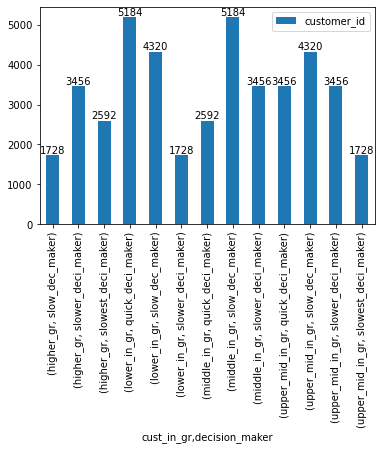

In [25]:
print ("graph from pivot table 4")
ax1=data3.plot(kind='bar')
ax1.bar_label(ax1.containers[0])

In [26]:
print("pivot table 5")
data4=pd.pivot_table(df,index=['cust_in_gr','decision_maker'],
                     values=[ "Pages Viewed", 'time_min','ammount_spend'],
                     aggfunc={"Pages Viewed":np.mean,'time_min':np.mean,'ammount_spend':np.mean})
data4 = data4.reset_index()
data4['ammount_spend']=np.round(data4['ammount_spend'],decimals=2)
data4['Pages Viewed']=np.round(data4['Pages Viewed'],decimals=2)
data4['time_min']=np.round(data4['time_min'],decimals=2)
data4 = pd.DataFrame(data4)
data4

pivot table 5


,cust_in_gr,decision_maker,Pages Viewed,ammount_spend,time_min
0,higher_gr,slow_dec_maker,7.00,11170.00,10.75
1,higher_gr,slower_deci_maker,6.25,11755.00,14.68
2,higher_gr,slowest_deci_maker,8.67,13934.67,29.13
3,lower_in_gr,quick_deci_maker,3.33,3047.33,7.12
4,lower_in_gr,slow_dec_maker,2.40,3950.80,11.24
5,lower_in_gr,slower_deci_maker,5.00,3369.00,16.00
6,middle_in_gr,quick_deci_maker,4.67,5225.67,6.53
7,middle_in_gr,slow_dec_maker,4.17,5670.17,10.55
8,middle_in_gr,slower_deci_maker,5.75,5555.50,15.55
9,upper_mid_in_gr,quick_deci_maker,4.00,7713.75,7.00


various graph from pivot table 5


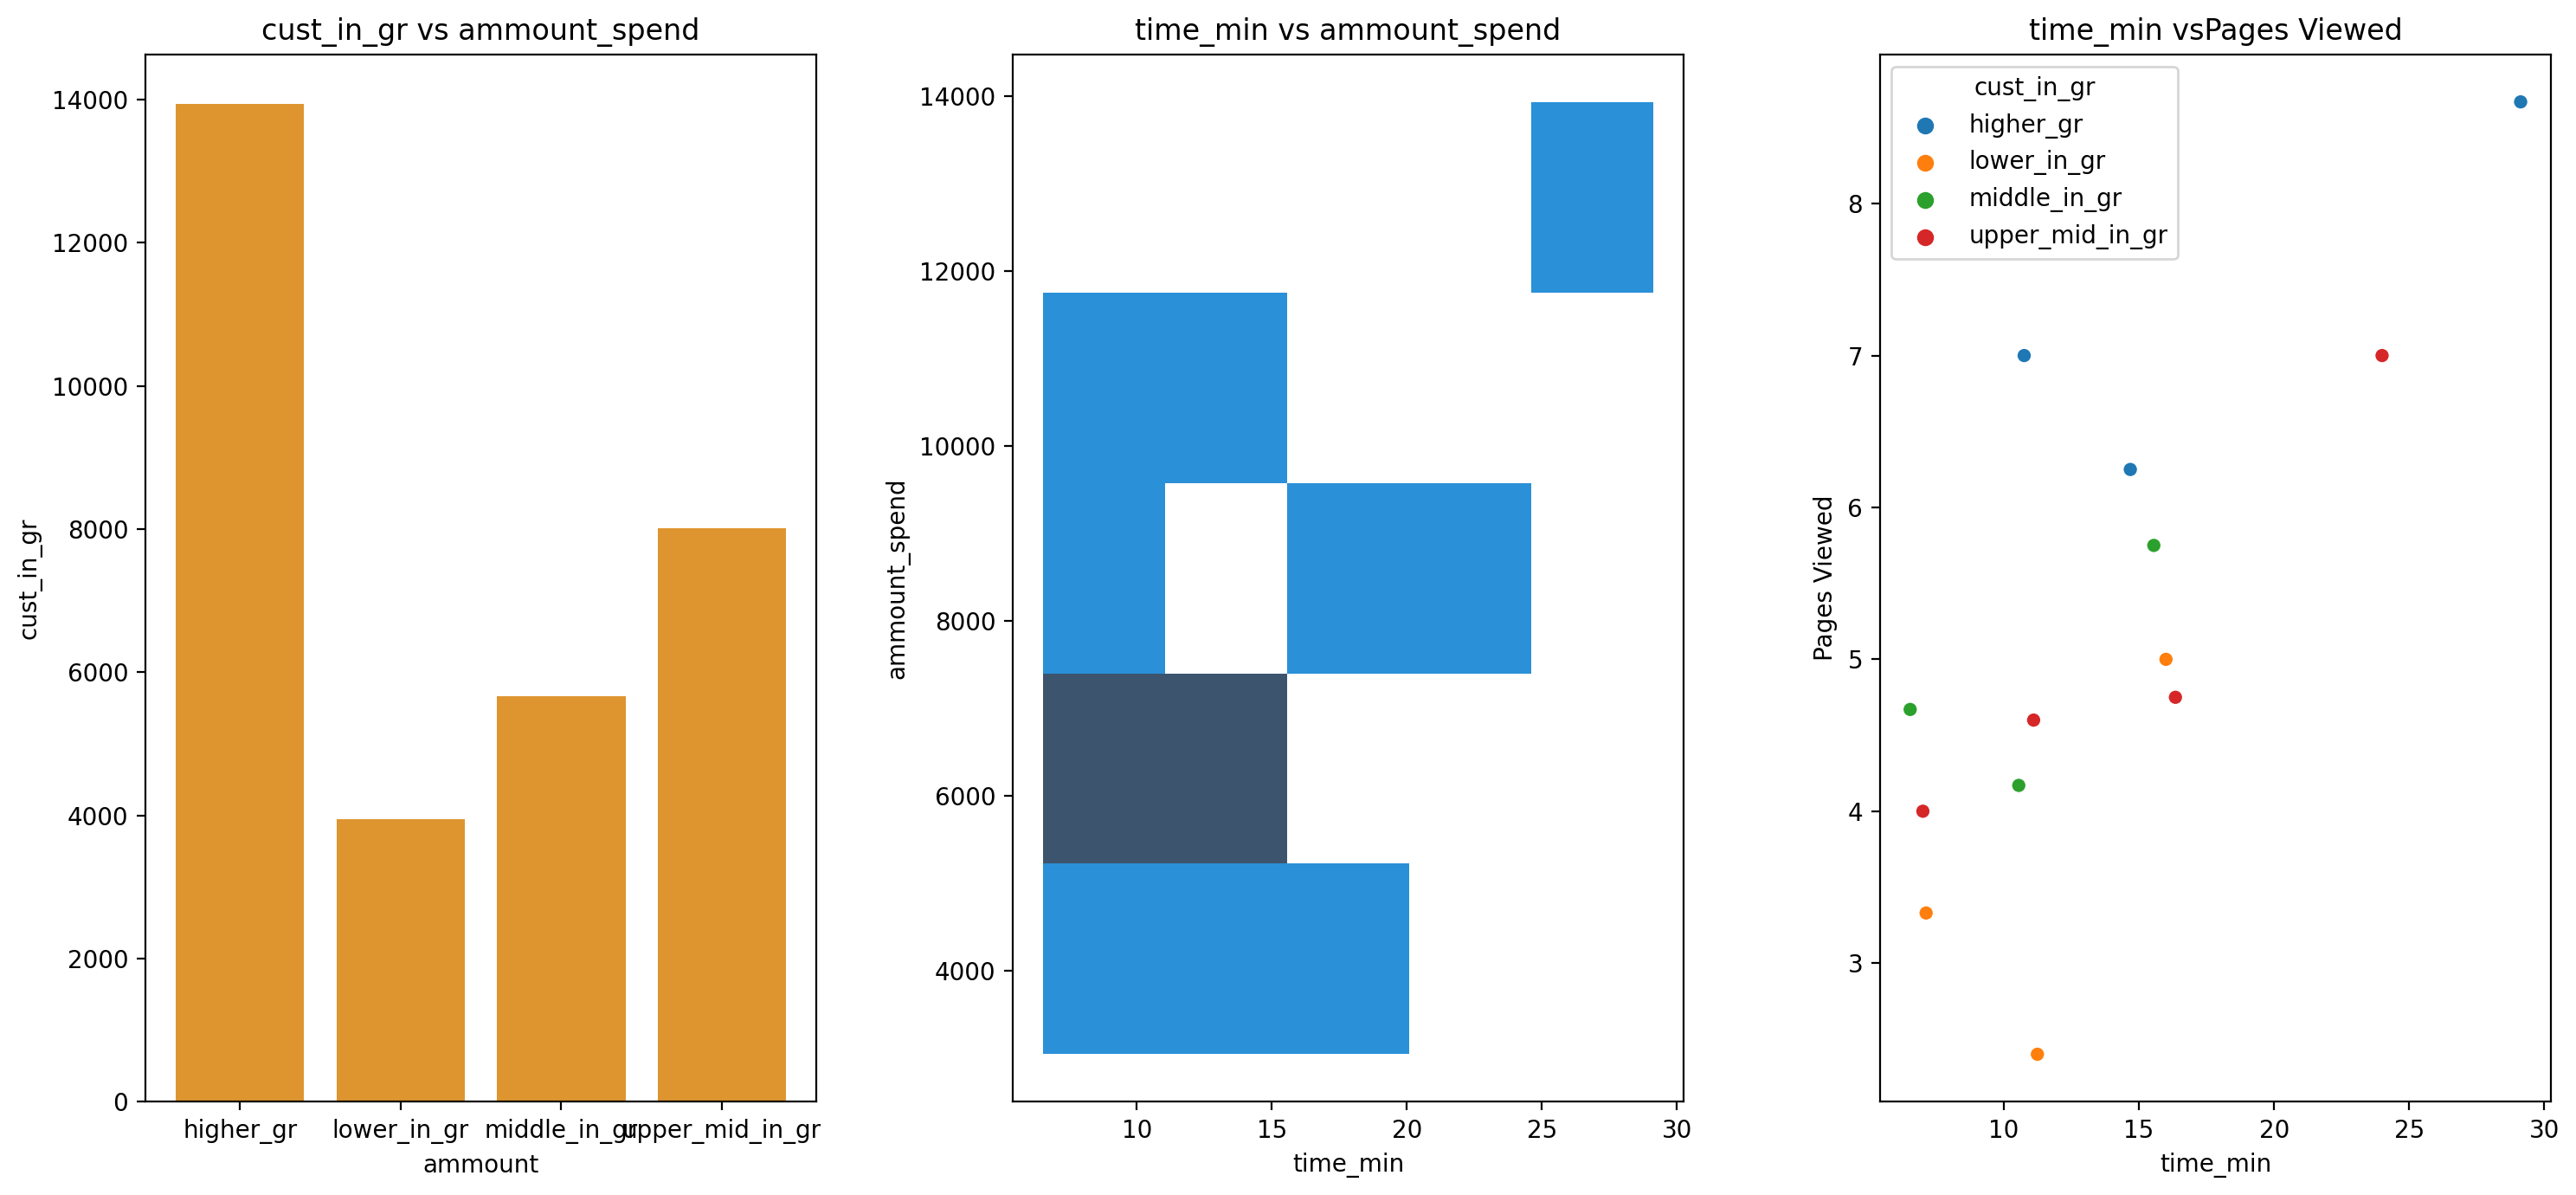

In [27]:
print("various graph from pivot table 5")
fig,axes=plt.subplots(1,3,figsize=(15,7),dpi=200)

ax1 = axes[0].bar(data4['cust_in_gr'],data4['ammount_spend'],color="#DE952F")
axes[0].set_title('cust_in_gr vs ammount_spend')
axes[0].set_xlabel("ammount")
axes[0].set_ylabel("cust_in_gr")


#ax1.bar_label(ax1.containers[0])
#histogram
ax2 = sns.histplot(ax=axes[1],data = data4,x='time_min',y='ammount_spend')
axes[1].set_title('time_min vs ammount_spend')

#scatterplot

ax3 = sns.scatterplot(ax=axes[2],x=data4['time_min'],y=data4['Pages Viewed'],hue=data4["cust_in_gr"])
axes[2].set_title('time_min vsPages Viewed')

#x2.bar_label(ax2.containers[0])
#fig.subplots_adjust(wspace=0.,hspace=0.8)
fig.subplots_adjust(right=0.88, wspace=0.9,hspace=0.9)
plt.tight_layout()


graph from pivot table 5


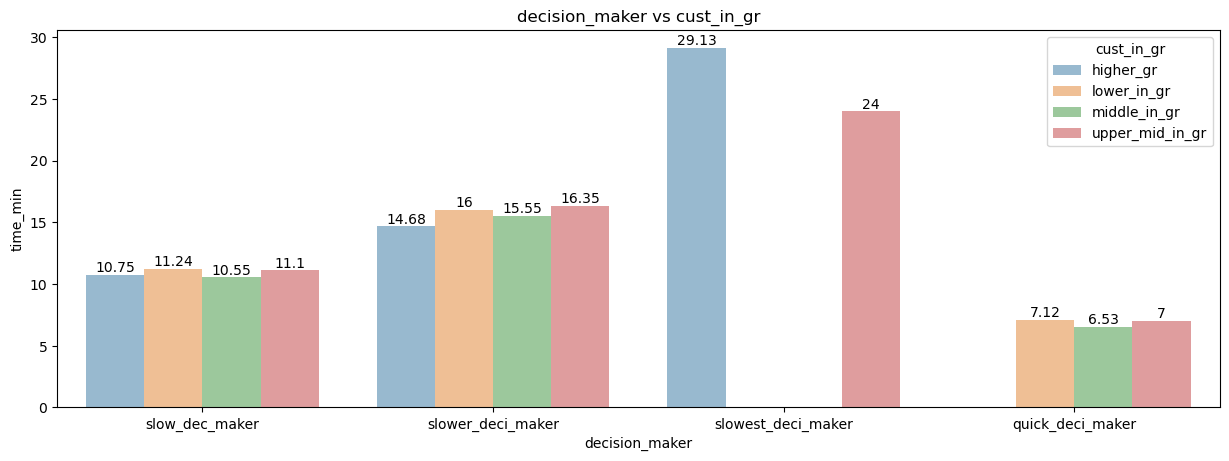

In [28]:
print("graph from pivot table 5")
fig=plt.figure(figsize=(15,5),dpi = 100)
ax4 = sns.barplot(x=data4['decision_maker'],y=data4['time_min'],alpha=0.5,hue=data4['cust_in_gr'])
plt.title('decision_maker vs cust_in_gr' )
for i in ax4.containers:
    ax4.bar_label(i,)

### BASIC STATISTICS-DESCRIPTIVE STATISTICS

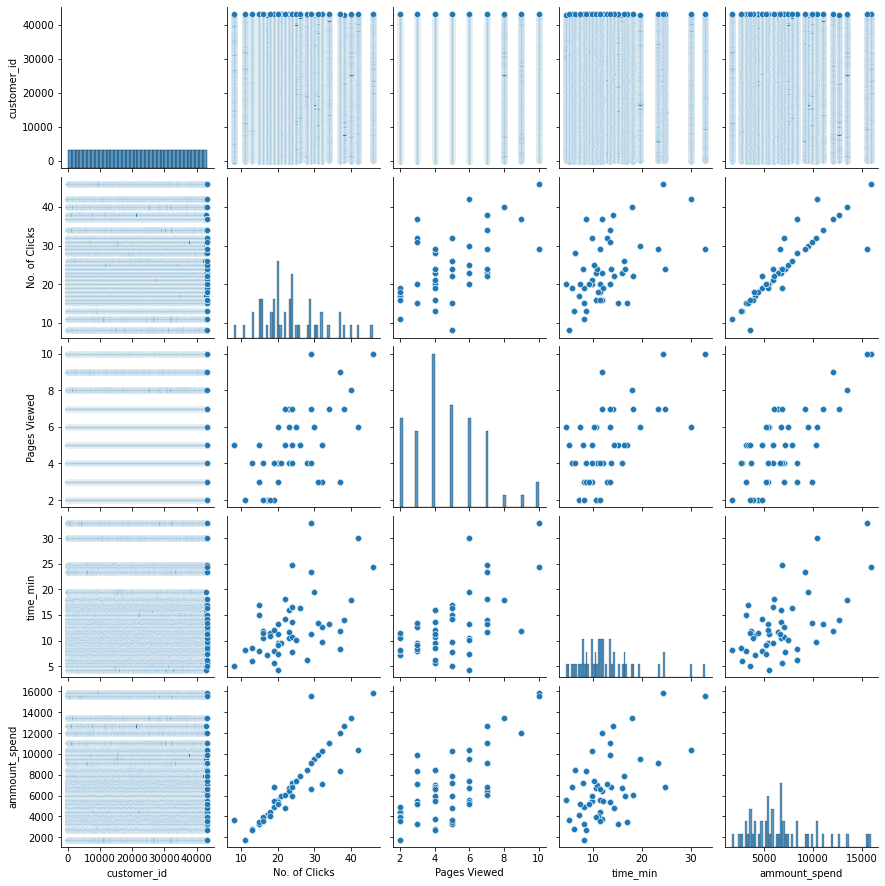

In [29]:
sns.pairplot(df)

In [30]:
# Corrlation
hist_=df.corr()
hist_

,No. of Clicks,Pages Viewed,time_min,ammount_spend
No. of Clicks,1.000000,0.566934,0.516365,0.903248
Pages Viewed,0.566934,1.000000,0.595568,0.723667
time_min,0.516365,0.595568,1.000000,0.580048
ammount_spend,0.903248,0.723667,0.580048,1.000000


<AxesSubplot:>

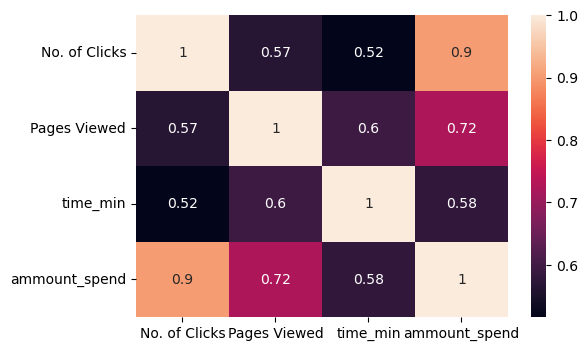

In [31]:
ig=plt.figure(dpi = 100)

sns.heatmap(hist_,annot=True)

In [32]:
# Descriptive analytics 

num_data=df[['No. of Clicks', 'Pages Viewed', 'time_min', 'ammount_spend']]
conti_=['No. of Clicks', 'Pages Viewed','time_min', 'ammount_spend']


def des_stats(data,col):
    print(f"The minimum of {col} is ",data[col].min())
    print(f"The Q1 of {col} is ",data[col].quantile(0.25)) #0.25=q1
    print(f"The Mean of {col} is ",data[col].mean())
    print(f"The Median of {col} is ",data[col].median()) #quantile(0.5)=q3
    print(f"The Q3 of {col} is ",data[col].quantile(0.75))
    print(f"The Maxmimum of {col} is ",data[col].max())
    print("\n")
    print(f"The Variance of {col} is ",data[col].var())
    print(f"The  Stdev of {col} is ",data[col].std())
    print(f"\n")
    print(f"The Skewness of {col} is ",data[col].skew())
    print(f"The Kurtosis of {col} is ",data[col].kurt())
    
for i in conti_:
    des_stats(df,i)
    print("\n")
    print("\n")

The minimum of No. of Clicks is  8
The Q1 of No. of Clicks is  18.0
The Mean of No. of Clicks is  23.74
The Median of No. of Clicks is  22.5
The Q3 of No. of Clicks is  29.0
The Maxmimum of No. of Clicks is  46


The Variance of No. of Clicks is  68.35398226812266
The  Stdev of No. of Clicks is  8.267646718874886


The Skewness of No. of Clicks is  0.6778995487598704
The Kurtosis of No. of Clicks is  0.025564361415895576




The minimum of Pages Viewed is  2
The Q1 of Pages Viewed is  3.0
The Mean of Pages Viewed is  4.82
The Median of Pages Viewed is  4.5
The Q3 of Pages Viewed is  6.0
The Maxmimum of Pages Viewed is  10


The Variance of Pages Viewed is  4.067694159586782
The  Stdev of Pages Viewed is  2.0168525378883757


The Skewness of Pages Viewed is  0.6268565557009698
The Kurtosis of Pages Viewed is  0.03487054911476628




The minimum of time_min is  4.3
The Q1 of time_min is  8.5
The Mean of time_min is  12.809999999998897
The Median of time_min is  11.4
The Q3 of time_min is